In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs


In [20]:
%run naturalGas_Wrangling.ipynb

In [3]:
gas_type.title

'Production of associated and non-associated natural gas, by State'

## Demand

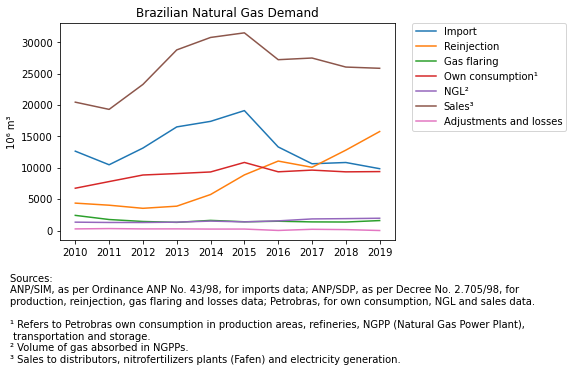

In [21]:
demand.df.plot()
plt.xticks(np.arange(2010,2020,1))
plt.ylabel(demand.unit)
plt.title(demand.title)
plt.figtext(0.01,-0.3, balance.footer)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('plots/demand.png',dpi=600,bbox_inches='tight')

## Balance

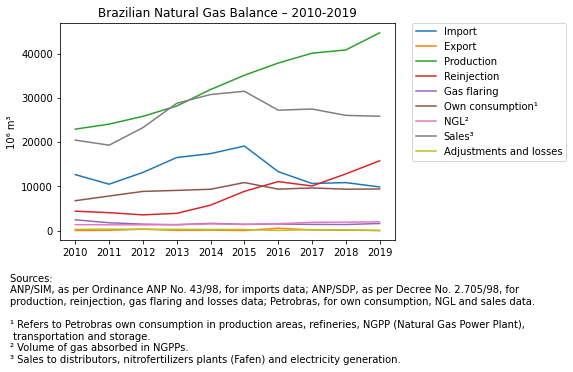

In [22]:

balance.df.plot()
plt.figtext(0.01,-0.3, balance.footer)
plt.ylabel(balance.unit)
plt.xticks(np.arange(2010,2020,1))
plt.title(balance.title)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('plots/balance.png',dpi=600,bbox_inches='tight')



## Balance Correlation

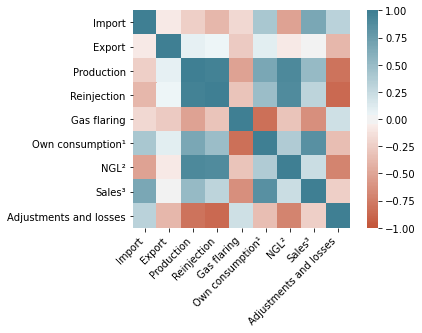

In [6]:
corr = balance.df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Electric Energy by Source

In [7]:
energy_source.df.sum(axis=0, level=0).loc[2010:2018]

,Biomass,Coal,Energy Produced Out of SIN,Eolic,Natural Gas,Nuclear,Diesel/Oil,Waste Industrial Processes,Solar,Hydroelectric
Year,,,,,,,,,,
2010,265.183572,6123.479089,11006.397509,1300.942330,25376.846631,14513.582356,3172.532468,2477.731590,0.000000,422773.914674
2011,193.056555,5676.794904,9079.996656,1689.192383,13239.901298,15658.926989,3115.516545,3625.073122,0.000000,449919.421308
2012,743.579620,7671.580370,12389.000000,3191.905070,34673.144100,16038.731210,6435.450620,2805.870970,0.000000,441176.992900
2013,1248.560320,13924.950800,11456.376389,4047.121200,58766.909120,14641.356400,13419.706880,2791.327440,0.000000,414587.398030
2014,722.944800,14296.228480,12456.101028,6559.336400,71719.203040,15377.230800,22656.147360,5699.290000,0.000000,392581.493280
2015,6231.440493,17928.595673,5875.902547,19750.961455,69408.261059,14734.155459,20326.711098,6474.084545,0.000000,380677.941897
2016,7536.164460,15606.387403,2702.887697,30430.665632,44335.167178,15808.649388,7837.091053,8632.847214,0.000000,406379.811886
2017,9026.314418,14950.828550,2779.614251,39569.141499,54084.875866,15732.613034,9254.371950,10483.436474,524.219052,394258.326505
2018,8746.024599,12567.356132,2974.635287,45148.016764,41833.510312,15474.412837,6103.918949,10360.136166,2526.204816,403616.472901


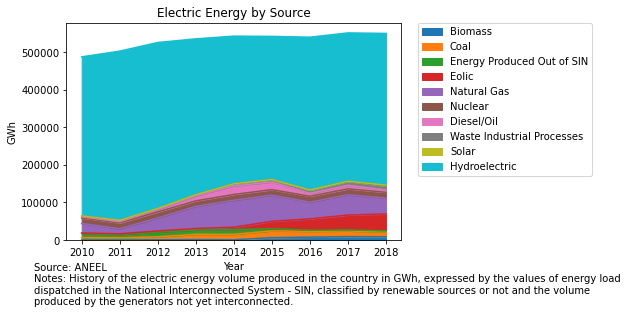

In [8]:
energy_source.df.loc[2010:2018].sum(axis=0, level=0).plot(kind='area')
plt.figtext(0.05,-0.1, energy_source.footer)
plt.ylabel(energy_source.unit)
plt.xticks(np.arange(2010,2019,1))
plt.title(energy_source.title)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.savefig('plots/energy_source.png',dpi=600,bbox_inches='tight')

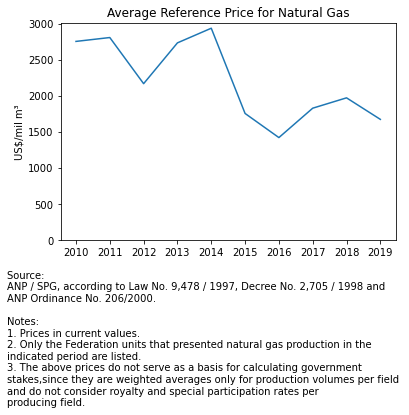

In [9]:
avg_price.df.sum(axis=1).plot()
plt.figtext(0.001,-0.45, avg_price.footer)
plt.ylabel(avg_price.unit)
plt.yticks(np.arange(0,3500,500))
plt.xticks(np.arange(2010,2020,1))
plt.title('Average Reference Price for Natural Gas')
plt.savefig('plots/avg_price.png',dpi=600,bbox_inches='tight')

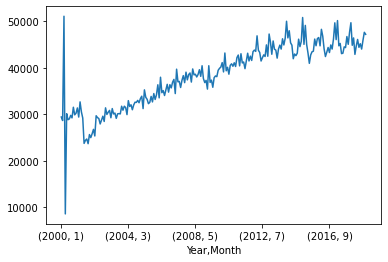

In [10]:
energy_source.df.sum(axis=1).plot();

In [11]:

# Declaring new datetime index (new_date) for a time series 
new_index=[]
new_date=[]

# Capturing dates from energy_source.df MultiIndex and saving in new_index list
for year, date in enumerate(energy_source.df.index):
    new_index.append([energy_source.df.index[year][0], energy_source.df.index[year][1], 1])
    
#
for date in new_index:
    new_date.append(datetime.datetime(*date))

In [12]:

dt = pd.date_range('1/1/2000', periods=228, freq='M')
dt

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', length=228, freq='M')

In [13]:
ts_energy = energy_source.df.sum(axis=1).to_frame('GWh')
ts_energy
ts_energy.insert(0,'Date',dt)
ts_energy.reset_index(inplace=True)
ts_energy.index = ts_energy['Date']
ts_energy.drop(['Year','Month','Date'], axis=1, inplace=True)

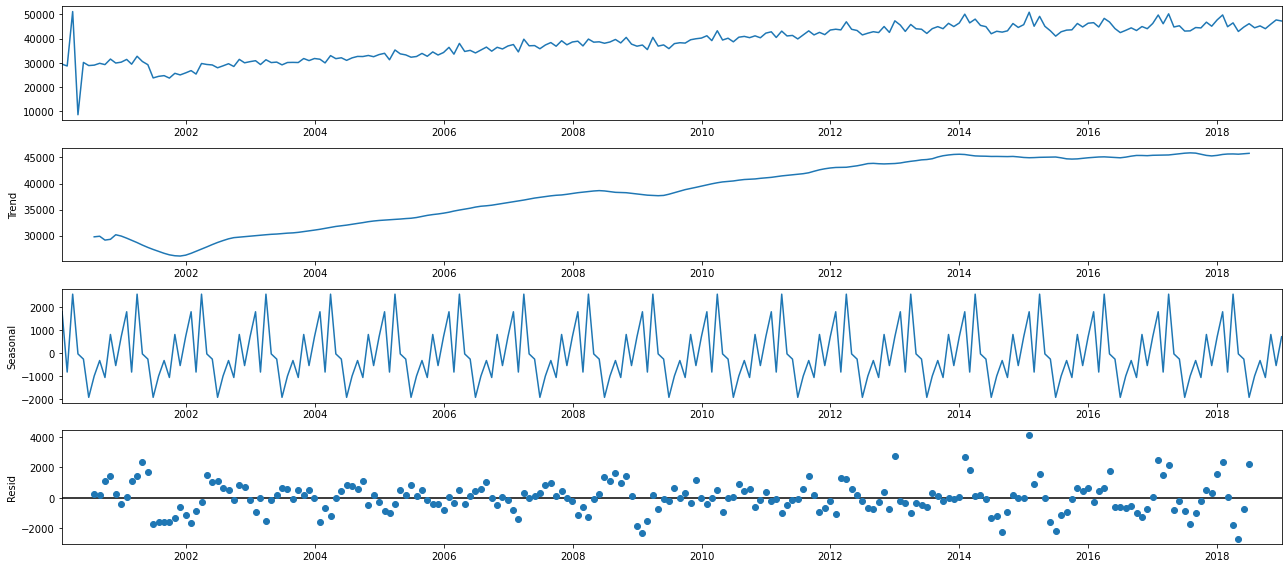

In [14]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_energy, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_energy,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

## ARIMA MODEL

Auto Regressive Integrated Moving Average Model is characterized by 3 terms:

> * `p`: is the order of the AR (Auto Regressive) term
> * `d`: is the number of differencing (Integrated) required to make the time series stationary
> * `q`: is the order of the MA (Moving Average) term


1 - `Why` make the time series `stationary`?

>The `Auto Regressive` term in ARIMA means that the linear regression model uses its own lags as predictors, and in order to do so, the time series need to be stationary.

2 - `How` to make it `stationary`?

>Differentiating it. Sometimes more than one differencing may be needed.

3 - What is the meaning of `order of AR term`?

>It is the number of lags of Y to be used as predictors.

4 - What is the meaning of `order of MA term`?

>It is the number of lagged forecast erros taht should go into the ARIMA Model.

5 - What is `Moving Average`?

>Is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.

### Auto Regressive Model

Is where $Y_{t}$ depends only on its own lags.

> $Y_{t} = \alpha + \beta_{1}Y_{t-1} + \beta_{2}Y_{t-2} + ... + \beta_{p}Y_{t-p} + \epsilon_{1} $

>* $Y_{t}$: is the $lag_{1}$ of the series.
>* $\beta_{1}$: is the coefficient of $lag_{1}$ that the model estimates
>* $\alpha$: is the intercept term, also estimated by the model.

### Moving Average Model

Is where $Y_{t}$ depends only on the lagged forecast errors.

> $Y_{t} = \alpha + \epsilon_{t} + \phi_{1} \epsilon_{t-1} + \phi_{2} \epsilon_{t-2}$ + ...  $+ \phi_{q} \epsilon_{t-q}$
>* $\epsilon_{t}$: is the errors from $Y_{t}$
>* $\epsilon_{t-1}$: is the errors from $Y_{t-1}$

### ARIMA MODEL EQUATION

Is where the time series was differenced at least one time to make it stationary and you combine the AR term and the MA term. So the equation becomes:

>$Y_{t} = \alpha + \beta_{1}Y_{t-1} + \beta_{2}Y_{t-2} + ... + \beta_{p}Y_{t-p}\epsilon_{t}$
$ + \phi_{1} \epsilon_{t-1} + \phi_{2} \epsilon_{t-2} + ... + \phi_{q} \epsilon_{t-q}$





In [16]:
# Finding d

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(avg_price.df.sum(axis=1))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.218029
p-value: 0.665792


<AxesSubplot:>

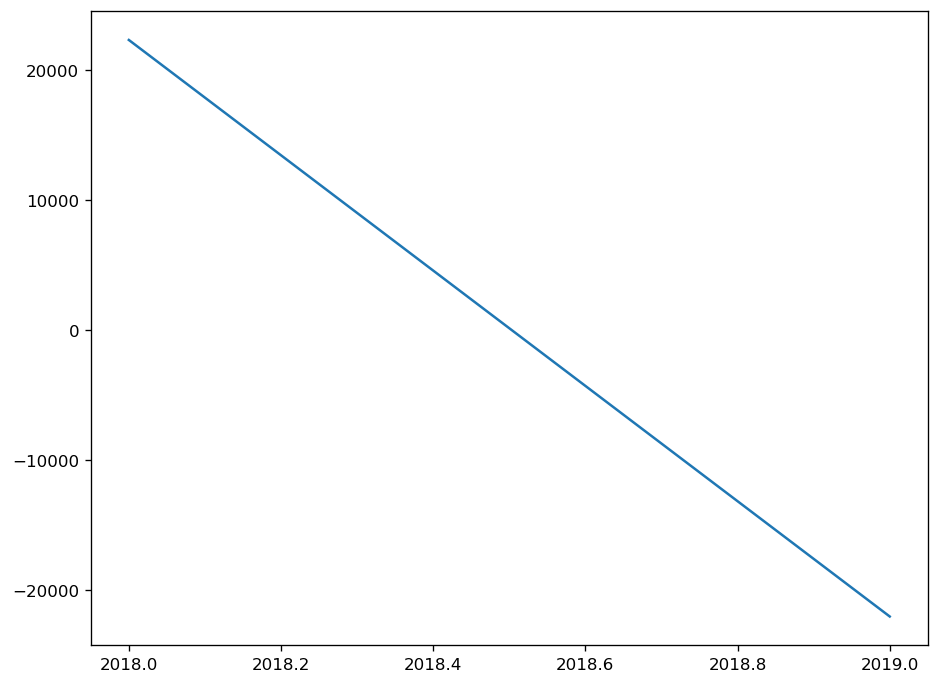

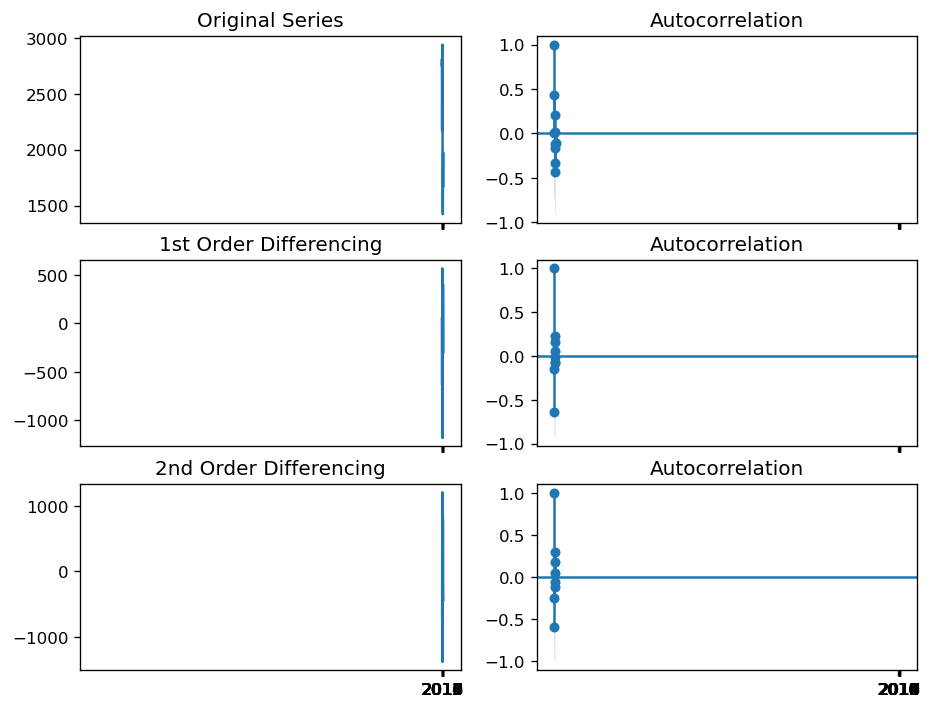